### Ingestion

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
reviews = pd.read_csv('yelp_reviews.csv')
reviews.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
reviews.head(5)

,date,review,rating,isEdited,userName,title,developerResponse
0,2024-11-16 17:12:47,let me tell you why I named this and encouragi...,5,False,Salonroxie,Encouraging App,NaN
1,2024-11-13 19:31:04,I vaguely remember yelp being a positive exper...,1,False,S_Mosher,Unreliable Dishonest Shady…. Let’s Cancel Yelp!,NaN
2,2024-10-11 18:43:56,I will not be using Yelp ever again. After a t...,1,False,jennausuwiajdneka,Horrible,NaN
3,2024-09-22 20:35:32,During think tank meetings with other business...,1,False,Srepman,Is yelp fair?,"{'id': 46973211, 'body': 'Thank you for taking..."
4,2024-10-24 17:15:35,"Brought my 2023 car, with 15,454 miles, to hav...",1,False,Livid Sr Citizen,"Discount Tire - Plymouth, MN",NaN


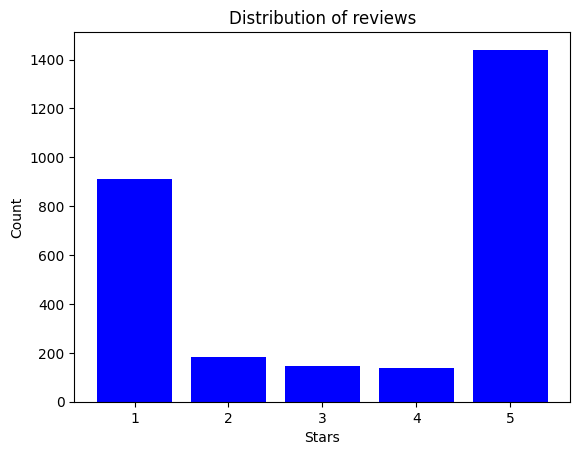

In [8]:
rating_agg = reviews.groupby('rating')['rating'].agg('count')

plt.bar(rating_agg.index, rating_agg.values, color = 'blue')
plt.title('Distribution of reviews')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

### Preprocessing

Change to correct data types

In [9]:
reviews['review'] = reviews['review'].astype('string')
reviews['title'] = reviews['title'].astype('string')

Import relevant libraries from NLTK

In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

Tokenization

In [11]:
tokens = word_tokenize(reviews['review'][0])
print(tokens)

['let', 'me', 'tell', 'you', 'why', 'I', 'named', 'this', 'and', 'encouraging', 'app', '.', 'I', 'am', 'at', 'that', 'age', 'that', 'people', 'overlook', '.', 'I', 'am', 'the', 'new', 'invisible', 'person', 'in', 'the', 'room', '.', 'When', 'I', 'began', 'doing', 'these', 'reviews', 'because', 'I', 'felt', 'like', 'I', 'am', 'a', 'pretty', 'even', 'keeled', 'honest', 'person', 'and', 'would', 'give', 'an', 'accurate', 'description', '.', 'It', 'kind', 'of', 'became', 'life-changing', '.', 'This', 'comes', 'with', 'the', 'responsibility', 'that', 'I', 'identify', 'with', '.', 'And', 'I', 'really', 'needed', 'that', 'right', 'now', 'I', 'feel', 'on', 'this', 'app', 'people', 'are', 'seeing', 'me', 'and', 'hearing', 'me', ',', 'and', 'appreciating', 'my', 'input', '.', 'So', 'not', 'only', 'am', 'I', 'giving', 'an', 'honest', 'representation', 'of', 'how', 'I', 'see', 'these', 'restaurants', 'but', 'I', '’', 'm', 'also', 'giving', 'acknowledgment', 'which', 'is', 'something', 'I', 'didn',

Removing stop words

In [12]:
stop_words = stopwords.words('english')

def remove_stop_words(variable):
    if variable not in stop_words:
        return True
    else:
        return False

filtered_tokens = filter(remove_stop_words, tokens)
filtered_tokens = list(filtered_tokens)
print(filtered_tokens)

['let', 'tell', 'I', 'named', 'encouraging', 'app', '.', 'I', 'age', 'people', 'overlook', '.', 'I', 'new', 'invisible', 'person', 'room', '.', 'When', 'I', 'began', 'reviews', 'I', 'felt', 'like', 'I', 'pretty', 'even', 'keeled', 'honest', 'person', 'would', 'give', 'accurate', 'description', '.', 'It', 'kind', 'became', 'life-changing', '.', 'This', 'comes', 'responsibility', 'I', 'identify', '.', 'And', 'I', 'really', 'needed', 'right', 'I', 'feel', 'app', 'people', 'seeing', 'hearing', ',', 'appreciating', 'input', '.', 'So', 'I', 'giving', 'honest', 'representation', 'I', 'see', 'restaurants', 'I', '’', 'also', 'giving', 'acknowledgment', 'something', 'I', '’', 'realize', 'badly', 'I', 'needed', '.', 'It', '’', 'win-win', 'read', 'reviews', ',', 'please', 'know', 'much', 'I', 'appreciate', 'appand', 'responsible', 'I', 'opinions', 'reviews', '.', 'I', 'give', 'every', 'place', 'I', 'go', 'second', 'chance', ',', 'app', 'gave', 'mine', '.']


Normalization
- lowercasing characters
- handling negations
- removing punctuations (just keeping alphabetical words)


Lowercase characters

In [13]:
lower_filtered_tokens = " ".join(filtered_tokens).lower().split(" ")
print(lower_filtered_tokens)

['let', 'tell', 'i', 'named', 'encouraging', 'app', '.', 'i', 'age', 'people', 'overlook', '.', 'i', 'new', 'invisible', 'person', 'room', '.', 'when', 'i', 'began', 'reviews', 'i', 'felt', 'like', 'i', 'pretty', 'even', 'keeled', 'honest', 'person', 'would', 'give', 'accurate', 'description', '.', 'it', 'kind', 'became', 'life-changing', '.', 'this', 'comes', 'responsibility', 'i', 'identify', '.', 'and', 'i', 'really', 'needed', 'right', 'i', 'feel', 'app', 'people', 'seeing', 'hearing', ',', 'appreciating', 'input', '.', 'so', 'i', 'giving', 'honest', 'representation', 'i', 'see', 'restaurants', 'i', '’', 'also', 'giving', 'acknowledgment', 'something', 'i', '’', 'realize', 'badly', 'i', 'needed', '.', 'it', '’', 'win-win', 'read', 'reviews', ',', 'please', 'know', 'much', 'i', 'appreciate', 'appand', 'responsible', 'i', 'opinions', 'reviews', '.', 'i', 'give', 'every', 'place', 'i', 'go', 'second', 'chance', ',', 'app', 'gave', 'mine', '.']


Handling chat words

In [14]:
print(reviews['review'][1].lower())

i vaguely remember yelp being a positive experience, it’s been many many years since that, at this point. it is absolutely infuriating that i cannot read yelp reviews in a browser!  ridiculous that i need to have the yelp app installed on my phone to access reviews. don’t get me wrong, i’ve installed, and used the yelp app numerous times on multiple devices and it’s always one of the first apps i uninstall when i need to clean up a device as it serves exactly no purpose. when attempting to review a review in yelp, it’s not possible without the app. whether i’m using google or chrome or safari, it doesn’t matter, it’s impossible to read a single review in its entirety. which is beyond dumb! however, when i’m automatically bumped into the app store as a means to bully and force me into installing the yelp app once again, i remember that yelp itself is a scam and the epitome of a dishonest, manipulative and, shady business!! which is the only thing about yelp that i appreciate!! why, beca

In [15]:
slang_file = open('slang.txt')
slang = slang_file.read()
slang_file.close()
slang_list = slang.split("\n")
del slang_list[-1]

def abbrev_def_split(x):
    x = x.replace('=', '`')
    x = x.replace(': ', '`')
    x = x.replace(' â€“ ', '`')
    x = x.replace('â€™', '’')
    x = x.replace('\t', '`')
    x = x.lower()
    return tuple(x.split('`'))

slang_def_dict = dict(map(abbrev_def_split, slang_list))

review_1 = reviews['review'][1].lower().split(" ")
review_1 = [slang_def_dict[word] if word in slang_def_dict else word for word in review_1]
review_1 = " ".join(review_1)
print(review_1)

i vaguely remember yelp being a positive experience, it’s been many many years since that, at this point. it is absolutely infuriating that i cannot read yelp reviews in a browser!  ridiculous that i need to have the yelp app installed on my phone to access reviews. don’t get me wrong, i’ve installed, and used the yelp app numerous times on multiple devices and it’s always one of the first apps i uninstall when i need to clean up a device as it serves exactly no purpose. when attempting to review a review in yelp, it’s not possible without the app. whether i’m using google or chrome or safari, it doesn’t matter, it’s impossible to read a single review in its entirety. which is beyond dumb! however, when i’m automatically bumped into the app store as a means to bully and force me into installing the yelp app once again, i remember that yelp itself is a scam and the epitome of a dishonest, manipulative and, shady business!! which is the only thing about yelp that i appreciate!! why, beca

Negation handling/handling contractions

In [16]:
import re

# Create lookup dictionary of contractions from excel table created from wikipedia page
contractions = pd.read_excel('contractions.xlsx', dtype = {'contraction': 'string', 'meaning': 'string'})

contractions['contraction'] = contractions['contraction'].apply(lambda x: x.replace('(informal)', ''))
contractions['meaning'] = contractions['meaning'].apply(lambda x: re.sub(r"\s/\s(.*)", "", x))
contractions['contraction'] = contractions['contraction'].apply(lambda x: x.lower())
contractions['contraction'] = contractions['contraction'].apply(lambda x: x.replace("'", "’"))
contractions['meaning'] = contractions['meaning'].apply(lambda x: x.lower())

keys = list(contractions.contraction)
values = list(contractions.meaning)
contraction_dict = dict(zip(keys, values))

review_1 = review_1.split(' ')
review_1 = [contraction_dict[word] if word in contraction_dict else word for word in review_1]
review_1 = " ".join(review_1)
print(review_1)

i vaguely remember yelp being a positive experience, it has been many many years since that, at this point. it is absolutely infuriating that i cannot read yelp reviews in a browser!  ridiculous that i need to have the yelp app installed on my phone to access reviews. do not get me wrong, i have installed, and used the yelp app numerous times on multiple devices and it has always one of the first apps i uninstall when i need to clean up a device as it serves exactly no purpose. when attempting to review a review in yelp, it has not possible without the app. whether i am using google or chrome or safari, it does not matter, it has impossible to read a single review in its entirety. which is beyond dumb! however, when i am automatically bumped into the app store as a means to bully and force me into installing the yelp app once again, i remember that yelp itself is a scam and the epitome of a dishonest, manipulative and, shady business!! which is the only thing about yelp that i apprecia

Remove punctuation

In [17]:
review_1 = word_tokenize(review_1)
review_1 = [word for word in review_1 if word.isalpha()]
review_1 = " ".join(review_1)

In [18]:
print(review_1)

i vaguely remember yelp being a positive experience it has been many many years since that at this point it is absolutely infuriating that i can not read yelp reviews in a browser ridiculous that i need to have the yelp app installed on my phone to access reviews do not get me wrong i have installed and used the yelp app numerous times on multiple devices and it has always one of the first apps i uninstall when i need to clean up a device as it serves exactly no purpose when attempting to review a review in yelp it has not possible without the app whether i am using google or chrome or safari it does not matter it has impossible to read a single review in its entirety which is beyond dumb however when i am automatically bumped into the app store as a means to bully and force me into installing the yelp app once again i remember that yelp itself is a scam and the epitome of a dishonest manipulative and shady business which is the only thing about yelp that i appreciate why because i ins

Lemmatize words

In [19]:
import spacy

In [21]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(review_1)

review_1_lemm = [f'{token.text}/{token.pos_}' for token in doc]
print(review_1_lemm)

['i/PRON', 'vaguely/ADV', 'remember/VERB', 'yelp/NOUN', 'being/AUX', 'a/DET', 'positive/ADJ', 'experience/NOUN', 'it/PRON', 'has/AUX', 'been/AUX', 'many/ADJ', 'many/ADJ', 'years/NOUN', 'since/SCONJ', 'that/PRON', 'at/ADP', 'this/DET', 'point/NOUN', 'it/PRON', 'is/AUX', 'absolutely/ADV', 'infuriating/VERB', 'that/SCONJ', 'i/PRON', 'can/AUX', 'not/PART', 'read/VERB', 'yelp/NOUN', 'reviews/NOUN', 'in/ADP', 'a/DET', 'browser/NOUN', 'ridiculous/NOUN', 'that/SCONJ', 'i/PRON', 'need/VERB', 'to/PART', 'have/VERB', 'the/DET', 'yelp/NOUN', 'app/NOUN', 'installed/VERB', 'on/ADP', 'my/PRON', 'phone/NOUN', 'to/PART', 'access/NOUN', 'reviews/NOUN', 'do/AUX', 'not/PART', 'get/VERB', 'me/PRON', 'wrong/ADJ', 'i/PRON', 'have/AUX', 'installed/VERB', 'and/CCONJ', 'used/VERB', 'the/DET', 'yelp/NOUN', 'app/NOUN', 'numerous/ADJ', 'times/NOUN', 'on/ADP', 'multiple/ADJ', 'devices/NOUN', 'and/CCONJ', 'it/PRON', 'has/VERB', 'always/ADV', 'one/NUM', 'of/ADP', 'the/DET', 'first/ADJ', 'apps/NOUN', 'i/PRON', 'uninst

### One Cleaning Function

Define one cleaning function using the code from earlier to create separate columns that have the words only, the parts of speech (POS) only, and the words and parts of speech tokenized together. This will help analyze things like word usage frequency, while also having a column (the tokenized word with the POS) that will be useful to the machine learning model.

In [42]:
# Create new dataframe

reviews_prep = reviews.copy()
reviews_prep = reviews_prep.drop(['isEdited', 'userName', 'developerResponse'], axis = 1)
reviews_prep.head(5)

,date,review,rating,title
0,2024-11-16 17:12:47,let me tell you why I named this and encouragi...,5,Encouraging App
1,2024-11-13 19:31:04,I vaguely remember yelp being a positive exper...,1,Unreliable Dishonest Shady…. Let’s Cancel Yelp!
2,2024-10-11 18:43:56,I will not be using Yelp ever again. After a t...,1,Horrible
3,2024-09-22 20:35:32,During think tank meetings with other business...,1,Is yelp fair?
4,2024-10-24 17:15:35,"Brought my 2023 car, with 15,454 miles, to hav...",1,"Discount Tire - Plymouth, MN"


In [43]:
# Preprocessing function

def preprocessingFunction(text):
    # Lowercase
    text = text.lower()
    
    # Handling chat words
    text = text.split(" ")
    text = [slang_def_dict[word] if word in slang_def_dict else word for word in text]
    text = " ".join(text)
    
    # Handling contractions
    text = text.split(" ")
    text = [contraction_dict[word] if word in contraction_dict else word for word in text]
    text = " ".join(text)
    
    # Remove punctuation
    text = word_tokenize(text)
    text = [word for word in text if word.isalpha()]
    text = " ".join(text)
    
    # Lemmentization with Spacy
    doc = nlp(text)
    output = [f'{token.text}/{token.pos_}' for token in doc]
    
    return output

reviews_prep['review_prepped'] = reviews_prep['review'].apply(preprocessingFunction)
reviews_prep['title_prepped'] = reviews_prep['title'].apply(preprocessingFunction)
reviews_prep.head(5)

,date,review,rating,title,review_prepped,title_prepped
0,2024-11-16 17:12:47,let me tell you why I named this and encouragi...,5,Encouraging App,"[let/VERB, me/PRON, tell/VERB, you/PRON, why/S...","[encouraging/VERB, app/NOUN]"
1,2024-11-13 19:31:04,I vaguely remember yelp being a positive exper...,1,Unreliable Dishonest Shady…. Let’s Cancel Yelp!,"[i/PRON, vaguely/ADV, remember/VERB, yelp/NOUN...","[unreliable/ADJ, dishonest/INTJ, let/VERB, us/..."
2,2024-10-11 18:43:56,I will not be using Yelp ever again. After a t...,1,Horrible,"[i/PRON, will/AUX, not/PART, be/AUX, using/VER...",[horrible/ADJ]
3,2024-09-22 20:35:32,During think tank meetings with other business...,1,Is yelp fair?,"[during/ADP, think/NOUN, tank/NOUN, meetings/N...","[is/AUX, yelp/NOUN, fair/ADJ]"
4,2024-10-24 17:15:35,"Brought my 2023 car, with 15,454 miles, to hav...",1,"Discount Tire - Plymouth, MN","[brought/VERB, my/PRON, car/NOUN, with/ADP, mi...","[discount/NOUN, tire/NOUN, plymouth/PROPN, mn/..."


In [44]:
# Functions to split the word/POS pairs into separate columns

def createTokenCol(preppedText):
    tokenPOSPairs = [tokenPosPair.split("/") for tokenPosPair in preppedText]
    tokens = [tokenPosPairSplit[0] for tokenPosPairSplit in tokenPOSPairs]
    tokens = ' '.join(tokens)
    
    return tokens

def createPOSCol(preppedText):
    tokenPOSPairs = [tokenPosPair.split("/") for tokenPosPair in preppedText]
    POSes = [tokenPosPairSplit[1] for tokenPosPairSplit in tokenPOSPairs]
    POSes = ' '.join(POSes)
    
    return POSes

reviews_prep['review_tokens'] = reviews_prep['review_prepped'].apply(createTokenCol)
reviews_prep['review_POSes'] = reviews_prep['review_prepped'].apply(createPOSCol)
reviews_prep['title_tokens'] = reviews_prep['title_prepped'].apply(createTokenCol)
reviews_prep['title_POSes'] = reviews_prep['title_prepped'].apply(createPOSCol)

reviews_prep.head(5)

,date,review,rating,title,review_prepped,title_prepped,review_tokens,review_POSes,title_tokens,title_POSes
0,2024-11-16 17:12:47,let me tell you why I named this and encouragi...,5,Encouraging App,"[let/VERB, me/PRON, tell/VERB, you/PRON, why/S...","[encouraging/VERB, app/NOUN]",let me tell you why i named this and encouragi...,VERB PRON VERB PRON SCONJ PRON VERB PRON CCONJ...,encouraging app,VERB NOUN
1,2024-11-13 19:31:04,I vaguely remember yelp being a positive exper...,1,Unreliable Dishonest Shady…. Let’s Cancel Yelp!,"[i/PRON, vaguely/ADV, remember/VERB, yelp/NOUN...","[unreliable/ADJ, dishonest/INTJ, let/VERB, us/...",i vaguely remember yelp being a positive exper...,PRON ADV VERB NOUN AUX DET ADJ NOUN PRON AUX A...,unreliable dishonest let us cancel yelp,ADJ INTJ VERB PRON VERB NOUN
2,2024-10-11 18:43:56,I will not be using Yelp ever again. After a t...,1,Horrible,"[i/PRON, will/AUX, not/PART, be/AUX, using/VER...",[horrible/ADJ],i will not be using yelp ever again after a te...,PRON AUX PART AUX VERB NOUN ADV ADV ADP DET AD...,horrible,ADJ
3,2024-09-22 20:35:32,During think tank meetings with other business...,1,Is yelp fair?,"[during/ADP, think/NOUN, tank/NOUN, meetings/N...","[is/AUX, yelp/NOUN, fair/ADJ]",during think tank meetings with other business...,ADP NOUN NOUN NOUN ADP ADJ NOUN NOUN ADP PRON ...,is yelp fair,AUX NOUN ADJ
4,2024-10-24 17:15:35,"Brought my 2023 car, with 15,454 miles, to hav...",1,"Discount Tire - Plymouth, MN","[brought/VERB, my/PRON, car/NOUN, with/ADP, mi...","[discount/NOUN, tire/NOUN, plymouth/PROPN, mn/...",brought my car with miles to have my snow tire...,VERB PRON NOUN ADP NOUN PART VERB PRON NOUN NO...,discount tire plymouth mn,NOUN NOUN PROPN NOUN


**Save to a csv**

In [46]:
reviews_prep.to_csv('reviews_prep.csv')